/var/folders/px/b3fg564n72s8jrpcc0p_6fmc0000gn/T/ipykernel_67015/1084356795.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  chi_data = pd.read_csv(chi_data_path, delim_whitespace=True, header=None)
/var/folders/px/b3fg564n72s8jrpcc0p_6fmc0000gn/T/ipykernel_67015/1084356795.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  eps_data = pd.read_csv(eps_data_path, delim_whitespace=True, header=None)


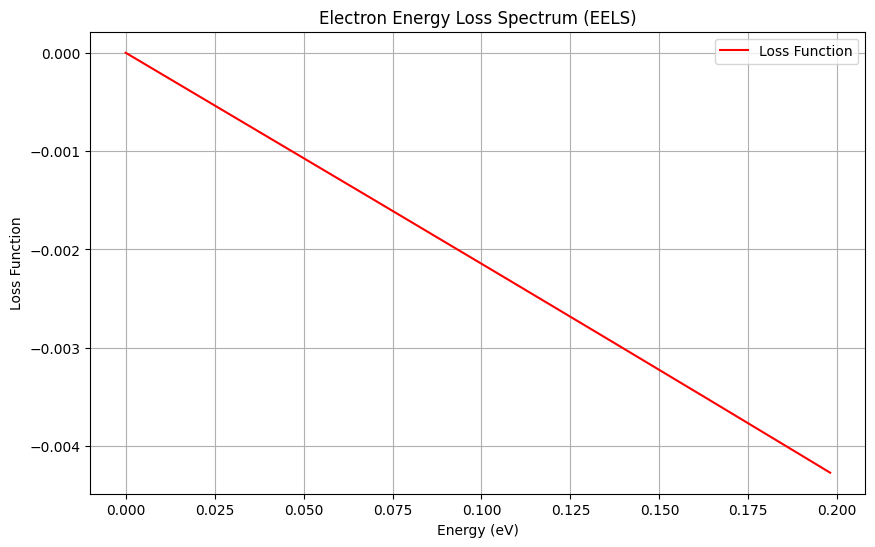

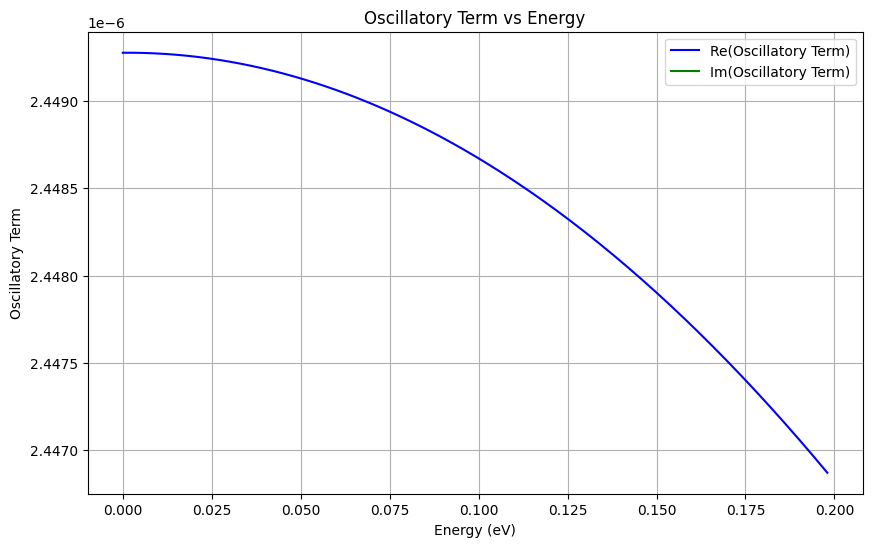

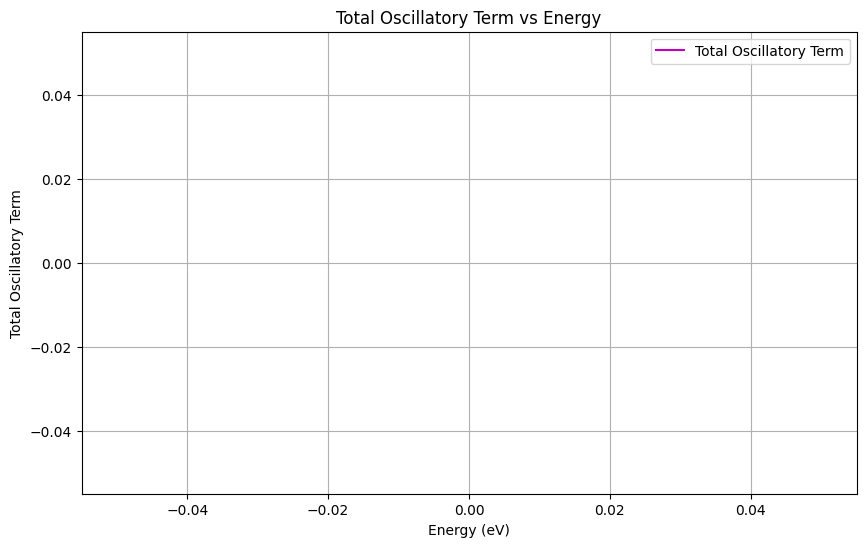

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data files
chi_data_path = 'tlk99_nm.plot_chi.dat'
eps_data_path = 'tlk99_nm.plot_eps.dat'

# Read the data files into pandas dataframes
chi_data = pd.read_csv(chi_data_path, delim_whitespace=True, header=None)
eps_data = pd.read_csv(eps_data_path, delim_whitespace=True, header=None)

# Clean the chi data
chi_data_cleaned = chi_data.drop([0, 1])
chi_data_cleaned.columns = ['ignore', 'energy_eV', 'Re_chi', 'extra1', 'Im_chi', 'extra2', 'extra3']
chi_data_cleaned = chi_data_cleaned.drop(['ignore', 'extra1', 'extra2', 'extra3'], axis=1)
chi_data_cleaned = chi_data_cleaned.apply(pd.to_numeric, errors='coerce')

# Clean the eps data
eps_data_cleaned = eps_data.drop([0])
eps_data_cleaned.columns = ['energy_eV', 'Re_1_over_eps', '-Im_1_over_eps', 'Re_eps', 'Im_eps', 'extra1', 'extra2']
eps_data_cleaned = eps_data_cleaned.drop(['extra1', 'extra2'], axis=1)
eps_data_cleaned = eps_data_cleaned.apply(pd.to_numeric, errors='coerce')

# Ensure both datasets have the same length
min_length = min(len(chi_data_cleaned), len(eps_data_cleaned))
chi_data_cleaned = chi_data_cleaned.iloc[:min_length]
eps_data_cleaned = eps_data_cleaned.iloc[:min_length]

# Extract the necessary columns
energy = eps_data_cleaned['energy_eV']
re_1_over_eps = eps_data_cleaned['Re_1_over_eps']
im_1_over_eps = eps_data_cleaned['-Im_1_over_eps']

# Compute the Loss Function: -Im[1/ε(ω)]
loss_function = -im_1_over_eps

# Plot the Loss Function
plt.figure(figsize=(10, 6))
plt.plot(energy, loss_function, label='Loss Function', color='r')
plt.xlabel('Energy (eV)')
plt.ylabel('Loss Function')
plt.title('Electron Energy Loss Spectrum (EELS)')
plt.legend()
plt.grid(True)
plt.show()

# Perform matrix calculations for the oscillatory term (example)
# Convert cleaned data to matrices
chi_matrix_re = chi_data_cleaned['Re_chi'].to_numpy()
chi_matrix_im = chi_data_cleaned['Im_chi'].to_numpy()
eps_matrix_re = eps_data_cleaned['Re_eps'].to_numpy()
eps_matrix_im = eps_data_cleaned['Im_eps'].to_numpy()

# Example matrix operation: product of chi and eps matrices
# Here, I assume the calculation involves simple element-wise multiplication for demonstration purposes
oscillatory_term_re = chi_matrix_re * eps_matrix_re
oscillatory_term_im = chi_matrix_im * eps_matrix_im

# Plot the Oscillatory Term
plt.figure(figsize=(10, 6))
plt.plot(energy, oscillatory_term_re, label='Re(Oscillatory Term)', color='b')
plt.plot(energy, oscillatory_term_im, label='Im(Oscillatory Term)', color='g')
plt.xlabel('Energy (eV)')
plt.ylabel('Oscillatory Term')
plt.title('Oscillatory Term vs Energy')
plt.legend()
plt.grid(True)
plt.show()

# Sum the oscillatory terms if needed (this depends on the specific theoretical approach)
total_oscillatory_term = oscillatory_term_re + oscillatory_term_im

# Plot the Total Oscillatory Term
plt.figure(figsize=(10, 6))
plt.plot(energy, total_oscillatory_term, label='Total Oscillatory Term', color='m')
plt.xlabel('Energy (eV)')
plt.ylabel('Total Oscillatory Term')
plt.title('Total Oscillatory Term vs Energy')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/px/b3fg564n72s8jrpcc0p_6fmc0000gn/T/ipykernel_67015/3785522404.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  chi_data = pd.read_csv(chi_data_path, delim_whitespace=True, header=None)
/var/folders/px/b3fg564n72s8jrpcc0p_6fmc0000gn/T/ipykernel_67015/3785522404.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  eps_data = pd.read_csv(eps_data_path, delim_whitespace=True, header=None)


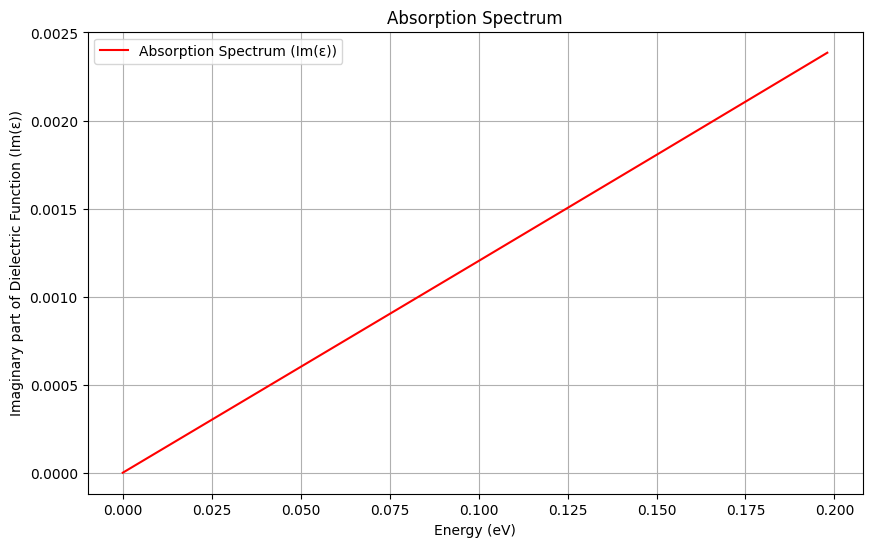

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data files into pandas dataframes
chi_data = pd.read_csv(chi_data_path, delim_whitespace=True, header=None)
eps_data = pd.read_csv(eps_data_path, delim_whitespace=True, header=None)

# Clean the chi data
chi_data_cleaned = chi_data.drop([0, 1])
chi_data_cleaned.columns = ['ignore', 'energy_eV', 'Re_chi', 'extra1', 'Im_chi', 'extra2', 'extra3']
chi_data_cleaned = chi_data_cleaned.drop(['ignore', 'extra1', 'extra2', 'extra3'], axis=1)
chi_data_cleaned = chi_data_cleaned.apply(pd.to_numeric, errors='coerce')

# Clean the eps data
eps_data_cleaned = eps_data.drop([0])
eps_data_cleaned.columns = ['energy_eV', 'Re_1_over_eps', '-Im_1_over_eps', 'Re_eps', 'Im_eps', 'extra1', 'extra2']
eps_data_cleaned = eps_data_cleaned.drop(['extra1', 'extra2'], axis=1)
eps_data_cleaned = eps_data_cleaned.apply(pd.to_numeric, errors='coerce')

# Ensure both datasets have the same length
min_length = min(len(chi_data_cleaned), len(eps_data_cleaned))
chi_data_cleaned = chi_data_cleaned.iloc[:min_length]
eps_data_cleaned = eps_data_cleaned.iloc[:min_length]

# Extract the necessary columns
energy = eps_data_cleaned['energy_eV']
im_eps = eps_data_cleaned['Im_eps']

# Plot the Absorption Spectrum (Imaginary part of the dielectric function)
plt.figure(figsize=(10, 6))
plt.plot(energy, im_eps, label='Absorption Spectrum (Im(ε))', color='r')
plt.xlabel('Energy (eV)')
plt.ylabel('Imaginary part of Dielectric Function (Im(ε))')
plt.title('Absorption Spectrum')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the chi data file
chi_data_path = 'tlk99_nm.plot_chi.dat'

# Read the data file into a pandas dataframe
chi_data = pd.read_csv(chi_data_path, delim_whitespace=True, header=None)

# Clean the chi data by removing header rows and irrelevant columns
chi_data_cleaned = chi_data.drop([0, 1])
chi_data_cleaned.columns = ['description', 'energy_eV', 'Re_chi', 'extra1', 'Im_chi', 'extra2', 'extra3']
chi_data_cleaned = chi_data_cleaned.drop(['extra1', 'extra2', 'extra3'], axis=1)
chi_data_cleaned = chi_data_cleaned.apply(pd.to_numeric, errors='coerce')

# Extract the unique energies and the matrix size
unique_energies = chi_data_cleaned['energy_eV'].unique()
matrix_size = int(np.sqrt(len(chi_data_cleaned) / len(unique_energies)))

# Initialize matrices for Re(chi) and Im(chi)
Re_chi_matrices = np.zeros((len(unique_energies), matrix_size, matrix_size))
Im_chi_matrices = np.zeros((len(unique_energies), matrix_size, matrix_size))

# Fill the matrices
for i, energy in enumerate(unique_energies):
    energy_data = chi_data_cleaned[chi_data_cleaned['energy_eV'] == energy]
    for index, row in energy_data.iterrows():
        # Extract row and column indices from the description
        row_col = row['description'].split('=')[0].split('_')[1:]
        row_idx = int(row_col[0]) - 1
        col_idx = int(row_col[1]) - 1
        
        # Fill the matrices
        Re_chi_matrices[i, row_idx, col_idx] = row['Re_chi']
        Im_chi_matrices[i, row_idx, col_idx] = row['Im_chi']

# Verify the matrices
print(f'Real part of Chi at first energy:\n{Re_chi_matrices[0]}')
print(f'Imaginary part of Chi at first energy:\n{Im_chi_matrices[0]}')

/var/folders/px/b3fg564n72s8jrpcc0p_6fmc0000gn/T/ipykernel_67015/3808313431.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  chi_data = pd.read_csv(chi_data_path, delim_whitespace=True, header=None)


AttributeError: 'numpy.float64' object has no attribute 'split'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data files into pandas dataframes
chi_data = pd.read_csv(chi_data_path, delim_whitespace=True, header=None)
eps_data = pd.read_csv(eps_data_path, delim_whitespace=True, header=None)

# Clean the chi data
chi_data_cleaned = chi_data.drop([0])

print(chi_data_cleaned)

            0                      1                      2  \
1    chi_1_1=  0.000000000000000E+00  -.326931307964427E-05   
2    chi_1_1=  0.100000000000000E-02  -.326931318906774E-05   
3    chi_1_1=  0.200000000000000E-02  -.326931351733831E-05   
4    chi_1_1=  0.300000000000000E-02  -.326931406445634E-05   
5    chi_1_1=  0.400000000000000E-02  -.326931483042238E-05   
..        ...                    ...                    ...   
196  chi_1_1=  0.195000000000000E+00  -.327348801887887E-05   
197  chi_1_1=  0.196000000000000E+00  -.327353109588364E-05   
198  chi_1_1=  0.197000000000000E+00  -.327357439626818E-05   
199  chi_1_1=  0.198000000000000E+00  -.327361792007944E-05   
200  chi_1_1=  0.199000000000000E+00  -.327366166736461E-05   

                         3    4    5    6  
1    -.236754922008172E-14  NaN  NaN  NaN  
2    -.299796474099142E-10  NaN  NaN  NaN  
3    -.599569597862762E-10  NaN  NaN  NaN  
4    -.899343371940156E-10  NaN  NaN  NaN  
5    -.119911812149098E

/var/folders/px/b3fg564n72s8jrpcc0p_6fmc0000gn/T/ipykernel_67015/2929755742.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  chi_data = pd.read_csv(chi_data_path, delim_whitespace=True, header=None)
/var/folders/px/b3fg564n72s8jrpcc0p_6fmc0000gn/T/ipykernel_67015/2929755742.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  eps_data = pd.read_csv(eps_data_path, delim_whitespace=True, header=None)


Real part of Chi at first energy:
[[-3.26931308e-06]]
Imaginary part of Chi at first energy:
[[-2.36754922e-15]]


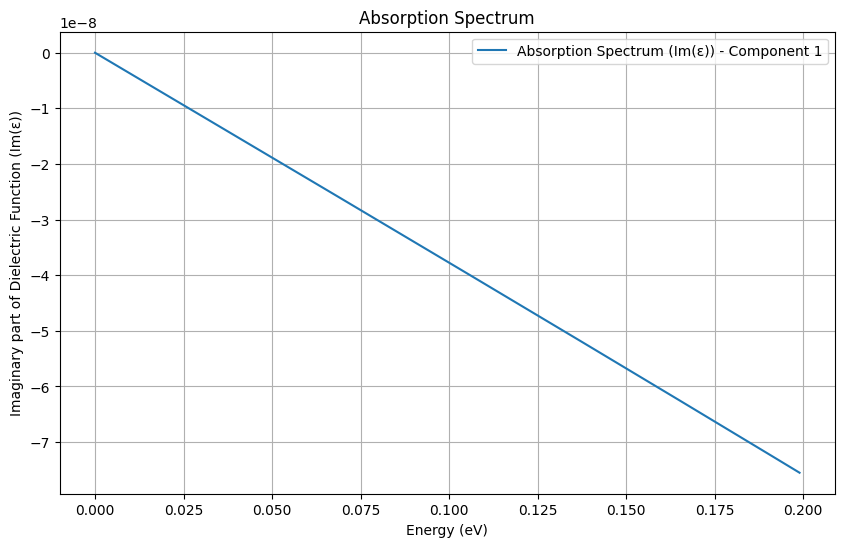

In [6]:

chi_data_cleaned.columns = ['description', 'energy_eV', 'Re_chi', 'Im_chi', 'extra1',  'extra2', 'extra3']
chi_data_cleaned = chi_data_cleaned.drop(['extra1', 'extra2', 'extra3'], axis=1)

# Convert only numeric columns to numeric values
chi_data_cleaned['energy_eV'] = pd.to_numeric(chi_data_cleaned['energy_eV'], errors='coerce')
chi_data_cleaned['Re_chi'] = pd.to_numeric(chi_data_cleaned['Re_chi'], errors='coerce')
chi_data_cleaned['Im_chi'] = pd.to_numeric(chi_data_cleaned['Im_chi'], errors='coerce')

# Clean the eps data
eps_data_cleaned = eps_data.drop([0])
eps_data_cleaned.columns = ['energy_eV', 'Re_1_over_eps', '-Im_1_over_eps', 'Re_eps', 'Im_eps', 'extra1', 'extra2']
eps_data_cleaned = eps_data_cleaned.drop(['extra1', 'extra2'], axis=1)
eps_data_cleaned = eps_data_cleaned.apply(pd.to_numeric, errors='coerce')

# Extract unique energies and determine matrix size
unique_energies = chi_data_cleaned['energy_eV'].unique()
matrix_size = int(np.sqrt(len(chi_data_cleaned) / len(unique_energies)))

# Initialize matrices for Re(chi) and Im(chi)
Re_chi_matrices = np.zeros((len(unique_energies), matrix_size, matrix_size))
Im_chi_matrices = np.zeros((len(unique_energies), matrix_size, matrix_size))

# Fill the matrices
for i, energy in enumerate(unique_energies):
    energy_data = chi_data_cleaned[chi_data_cleaned['energy_eV'] == energy]
    for index, row in energy_data.iterrows():
        # Extract row and column indices from the description
        row_col = row['description'].split('=')[0].split('_')[1:]
        row_idx = int(row_col[0]) - 1
        col_idx = int(row_col[1]) - 1
        
        # Fill the matrices
        Re_chi_matrices[i, row_idx, col_idx] = row['Re_chi']
        Im_chi_matrices[i, row_idx, col_idx] = row['Im_chi']

# Verify the matrices
print(f'Real part of Chi at first energy:\n{Re_chi_matrices[0]}')
print(f'Imaginary part of Chi at first energy:\n{Im_chi_matrices[0]}')

# Calculate the dielectric function
Re_eps_matrices = 1 + 4 * np.pi * Re_chi_matrices
Im_eps_matrices = 4 * np.pi * Im_chi_matrices

# Extract the imaginary part of the dielectric function for absorption spectrum
absorption_spectrum = np.diagonal(Im_eps_matrices, axis1=1, axis2=2)

# Plot the absorption spectrum
plt.figure(figsize=(10, 6))
for i in range(matrix_size):
    plt.plot(unique_energies, absorption_spectrum[:, i], label=f'Absorption Spectrum (Im(ε)) - Component {i+1}')
plt.xlabel('Energy (eV)')
plt.ylabel('Imaginary part of Dielectric Function (Im(ε))')
plt.title('Absorption Spectrum')
plt.legend()
plt.grid(True)
plt.show()